In [1]:
from os.path import join

import numpy as np
from numpy.linalg import pinv

from scipy.io import loadmat
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
dogdata_w_mat = loadmat(join('..', 'DATA', 'dogData_w.mat'))
catdata_w_mat = loadmat(join('..', 'DATA', 'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

_, nimages = dog_wave.shape
ntrain = 60
ntest = nimages - ntrain

train = np.hstack(
    [dog_wave[:, :ntrain], cat_wave[:, :ntrain]]
)
test = np.hstack(
    [dog_wave[:, ntrain:], cat_wave[:, ntrain:]]
)
label = np.repeat([1, -1], ntrain)

In [3]:
A_pinv = label @ pinv(train)
test_labels_pinv = np.sign(A_pinv @ test)

A_lasso = Lasso(alpha=0.5).fit(train.T, label).coef_
test_labels_lasso = np.sign(A_lasso @ test)

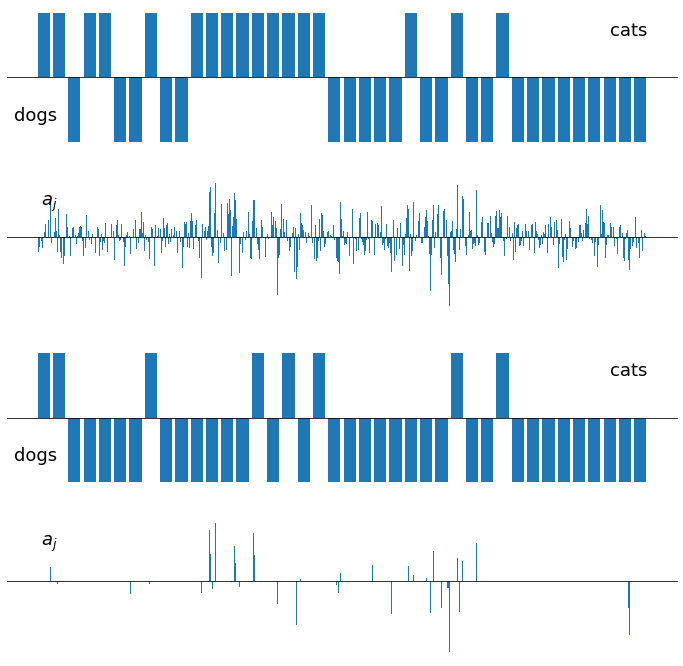

In [4]:
# Figure 6.3

fig, axs = plt.subplots(4, 1, figsize=(12, 12))
for ax, x in zip(axs, [test_labels_pinv, A_pinv, test_labels_lasso, A_lasso]):
    ax.bar(range(len(x)), x)
   
    ax.axes.yaxis.set_ticks([])
    ax.axes.xaxis.set_ticks([])
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
    ax.spines['bottom'].set_position('zero')


for ax in axs[0::2]:
    ax.text(0.01, 0.2, 'dogs', transform=ax.transAxes)
    ax.text(0.9, 0.8, 'cats', transform=ax.transAxes)

for ax in axs[1::2]:
    ax.text(0.05, 0.8, '$a_j$', transform=ax.transAxes)

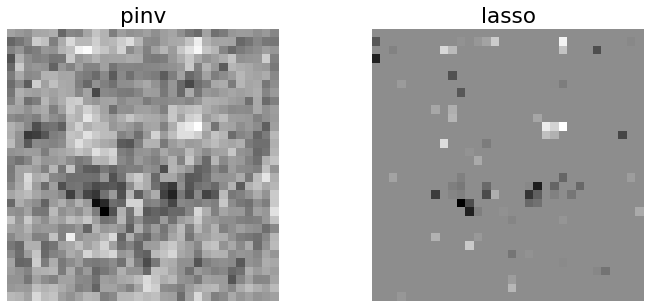

In [5]:
# Figure 6.4

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for ax, A, title in zip(axs.flat, [A_pinv, A_lasso], ['pinv', 'lasso']):
    im = np.rot90(A.reshape(32, 32), 3)
    ax.imshow(im, cmap='gray')
    ax.axis(False)
    ax.set_title(title)